# Pre-Processing

(309700, 2, 75)
(309700, 75)
torch.Size([250000, 75])
True
True
torch.Size([249999, 75])
torch.Size([249999, 75])
torch.Size([50000, 75])
torch.Size([50000, 75])


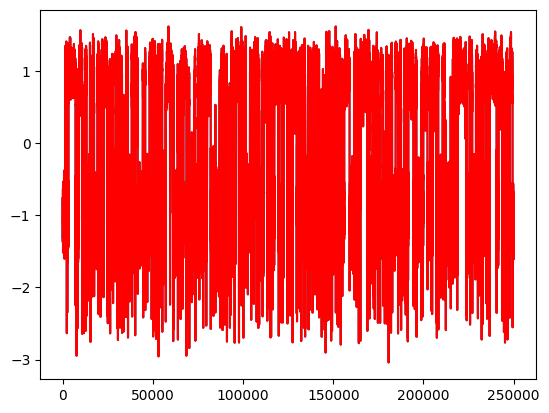

In [13]:
# Init pack
#run the model without additional noise, plot the same intial conditions observe if the determinstic emulation matches the physical model
#emulator smooths out to a state in the same way as the physical model

import numpy as np
import numpy as np
from scipy.integrate import solve_ivp
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import sys
import torch
import matplotlib.pyplot as plt

psi = np.load(r'C:\Users\danie\OneDrive\Desktop\work_torch\long_run_310k.npy')
print(psi.shape)

psi = psi[:,1,:]
print(psi.shape)

# Normalization
mean_psi = np.mean(psi, axis=0, keepdims=True)
std_psi = np.std(psi, axis=0, keepdims=True)
psi = (psi - mean_psi) / std_psi

# Pre-processing
lead = 1

trainN = 250000
valN = 50000
index = 63


psi_train_input = torch.tensor(psi[0:trainN, :], dtype=torch.float32)
print(psi_train_input.shape)
plt.plot(psi_train_input[:,63])
psi_train_label =  torch.tensor(psi[lead:trainN+lead, :], dtype=torch.float32)
plt.plot(psi_train_label[:,63], color='r')

# Make sure input and label lengths match
assert psi_train_input.shape[0] == psi_train_label.shape[0], "Input and label length mismatch"

#shuffle and map indices\
valid_indices = np.arange(0, trainN - lead)
np.random.seed(42)  # Optional for reproducibility
shuffled_indices = np.random.permutation(valid_indices)

psi_train_input = torch.tensor(psi[shuffled_indices, :], dtype=torch.float32)
psi_train_label = torch.tensor(psi[shuffled_indices + lead, :], dtype=torch.float32)

t = shuffled_indices[0]
print(torch.allclose(psi_train_input[0], torch.tensor(psi[t], dtype=torch.float32)))
print(torch.allclose(psi_train_label[0], torch.tensor(psi[t + 1], dtype=torch.float32)))

psi_val_input = torch.tensor(psi[trainN:trainN+valN], dtype=torch.float32)
psi_val_label = torch.tensor(psi[trainN+lead:trainN+valN+lead], dtype=torch.float32)

print(psi_train_input.shape)
print(psi_train_label.shape)
print(psi_val_input.shape)
print(psi_val_label.shape)
plt.show()
# plt.plot(psi_val_input[0:50000,63]

# Model Architecture

In [14]:
# Define the decoder (MLP)
class Decoder(nn.Module):
    def __init__(self, latent_dim, output_dim, condition_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim + condition_dim, 512)  
        self.fc2 = nn.Linear(512, 512)  
        self.fc3 = nn.Linear(512, 512) 
        self.fc4 = nn.Linear(512, 512)  
        self.fc5 = nn.Linear(512, 512)  
        self.fc6 = nn.Linear(512, 512)  
        self.fc_output = nn.Linear(512, output_dim)

    def forward(self, z, condition):
        z = torch.cat((z, condition), dim=1)  # Concatenate latent vector and condition
        z = torch.relu(self.fc1(z))  # Activation function for hidden layer
        z = torch.relu(self.fc2(z)) + z
        z = torch.relu(self.fc3(z)) + z
        z = torch.relu(self.fc4(z)) + z
        z = torch.relu(self.fc5(z)) + z
        z = torch.relu(self.fc6(z)) + z
        output = self.fc_output(z)
        return output

# Define the LatentDecoder class
class LatentDecoder(nn.Module):
    def __init__(self, latent_dim, output_dim, condition_dim):
        super(LatentDecoder, self).__init__()
        self.decoder = Decoder(latent_dim, output_dim, condition_dim)

    def decode(self, z, condition):
        return self.decoder(z, condition)

    def forward(self, z, condition,):
        output = self.decode(z, condition)
        return output

output_dim = 75
latent_dim = 1024
condition_dim = 75
batch_size = 1024
num_epochs = 100

# Initialize Model and Set Folder Path

In [15]:
import datetime
import os
# init the model and optimizer
model = LatentDecoder(latent_dim, output_dim, condition_dim)
model = model.cuda()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S.%f")
folder = f"model_at_{timestamp}"
model_weights_path = f'{folder}/model_weights_pytorch.pth'
os.makedirs(folder)

# Training

Reference Real Data average_transition_time: 759.8341708542714
Epoch 1, 
        Reconstrunction Loss: 0.03269362449645996

        Validation Reconstrunction Loss: 0.05158081650733948


Mini Inference at Epoch 0: 100%|██████████| 3000/3000 [00:01<00:00, 1998.71it/s]


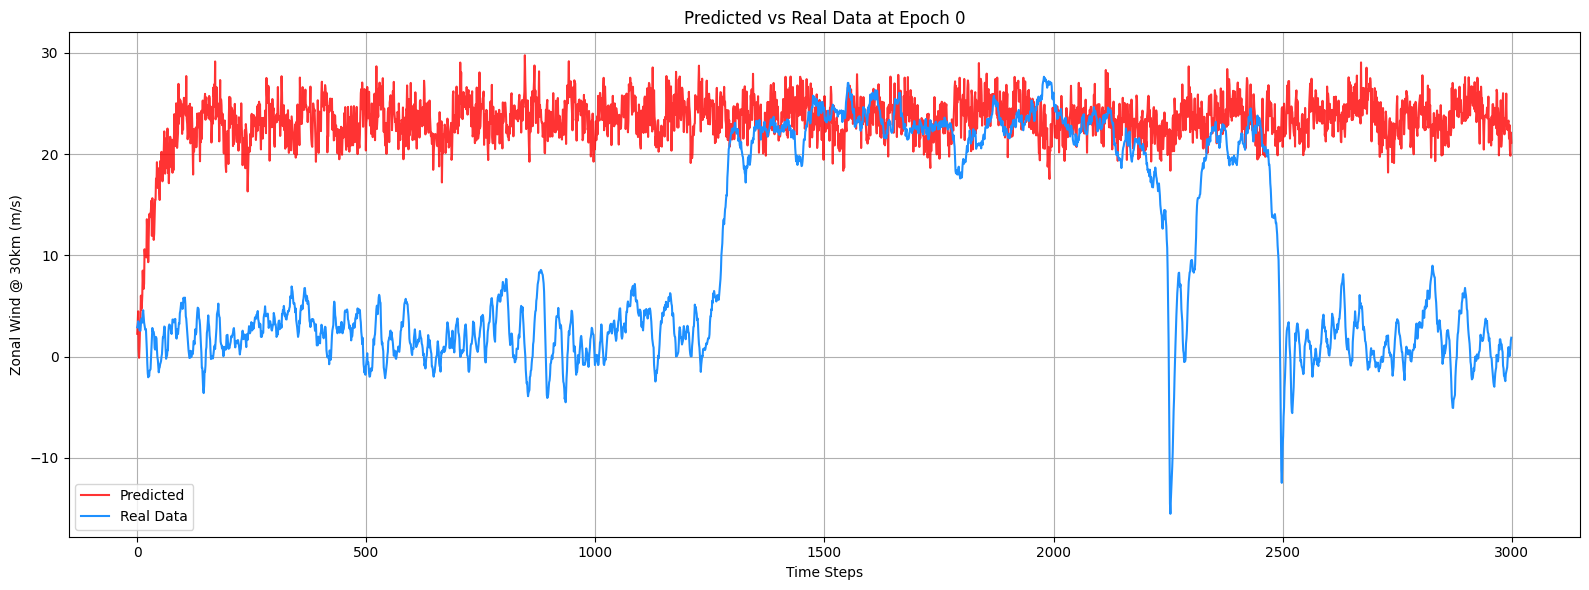

Epoch 2, 
        Reconstrunction Loss: 0.021281063556671143

        Validation Reconstrunction Loss: 0.035753097385168076


Mini Inference at Epoch 1: 100%|██████████| 3000/3000 [00:01<00:00, 1964.63it/s]


<Figure size 640x480 with 0 Axes>

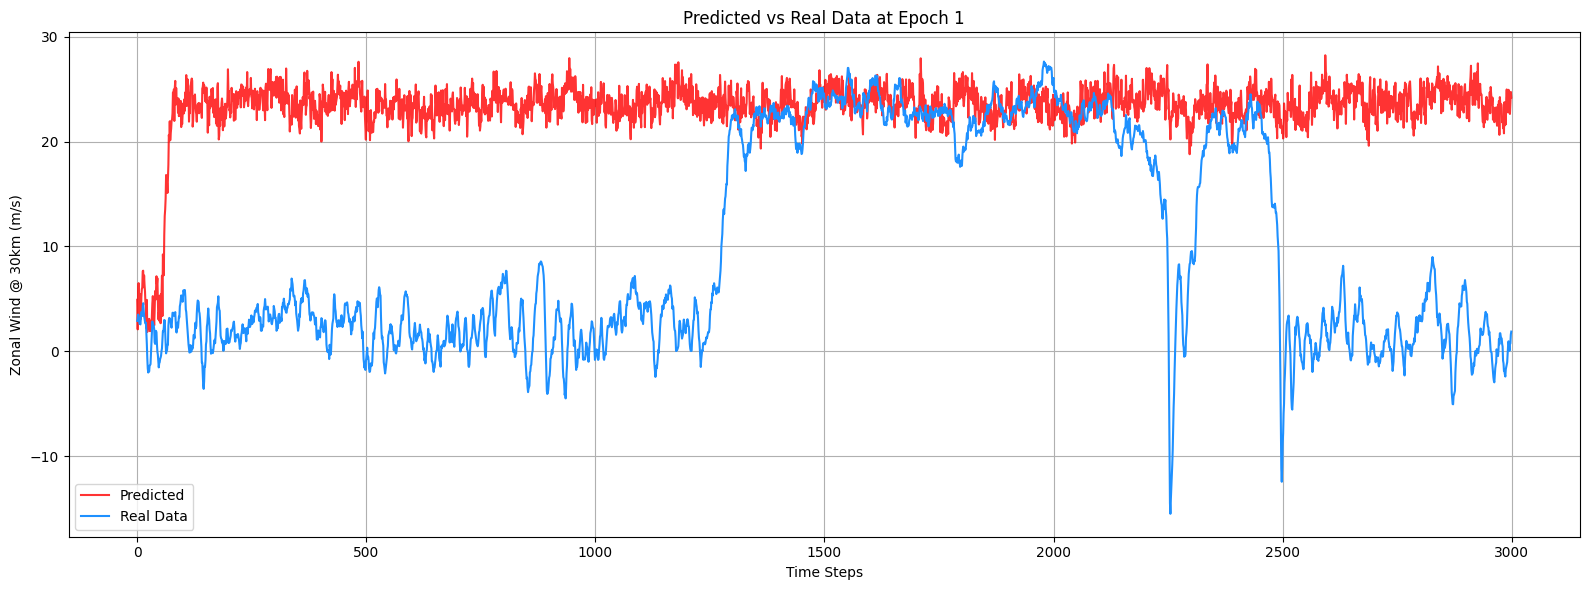

Epoch 3, 
        Reconstrunction Loss: 0.015135051682591438

        Validation Reconstrunction Loss: 0.02619442716240883


Mini Inference at Epoch 2: 100%|██████████| 3000/3000 [00:01<00:00, 1980.78it/s]


<Figure size 640x480 with 0 Axes>

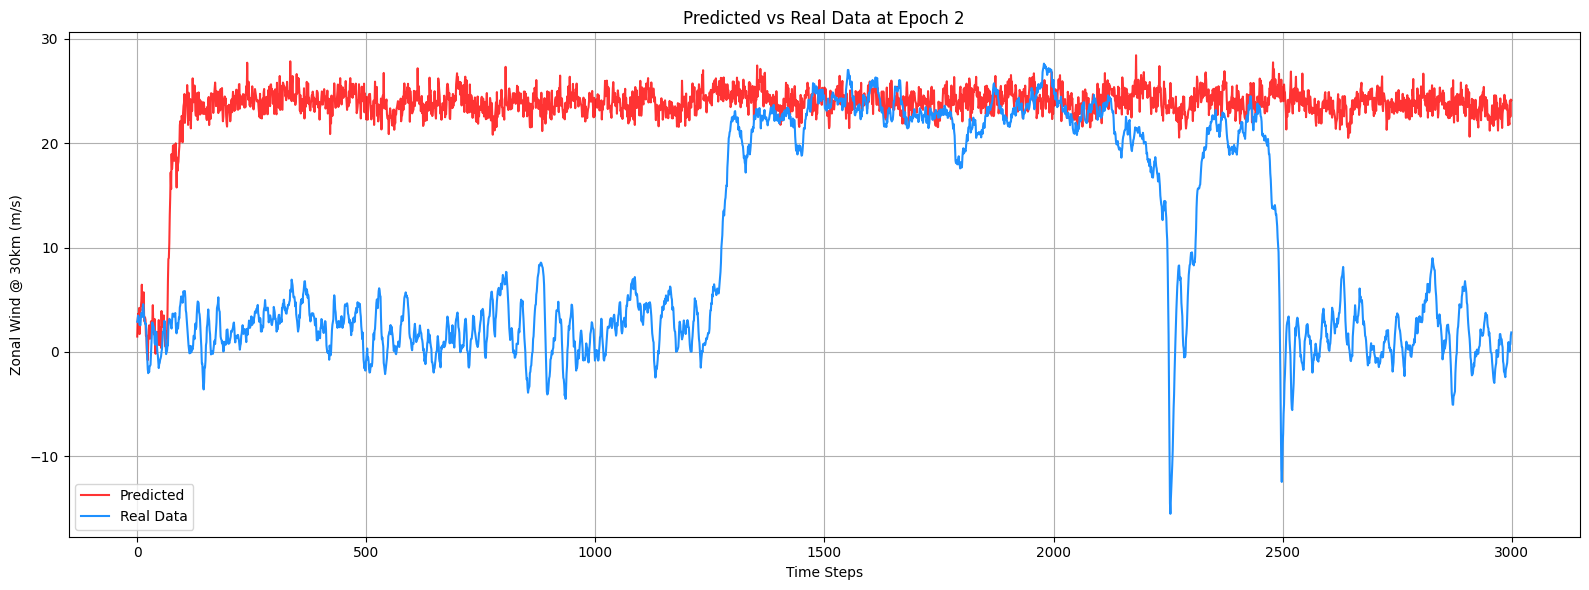

Epoch 4, 
        Reconstrunction Loss: 0.011481523513793945

        Validation Reconstrunction Loss: 0.020590204745531082


Mini Inference at Epoch 3: 100%|██████████| 3000/3000 [00:01<00:00, 1929.30it/s]


<Figure size 640x480 with 0 Axes>

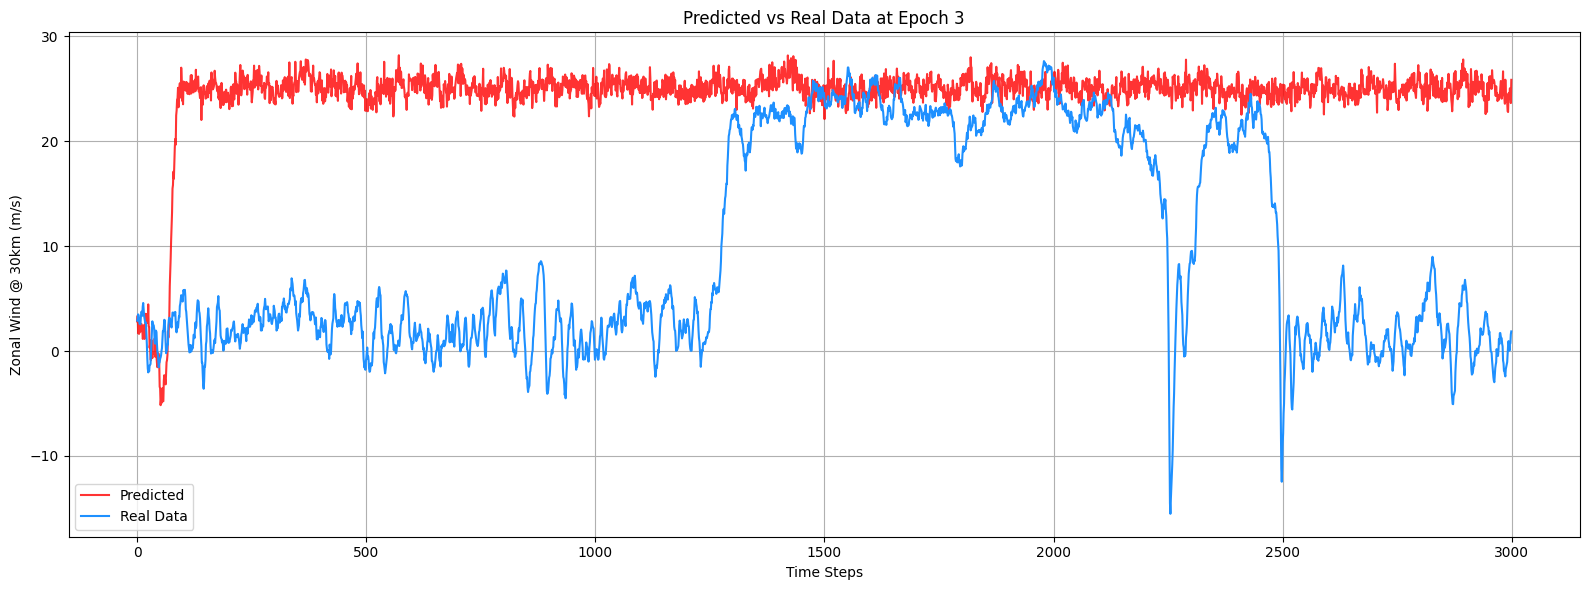

Epoch 5, 
        Reconstrunction Loss: 0.00943949818611145

        Validation Reconstrunction Loss: 0.015918532386422157


Mini Inference at Epoch 4: 100%|██████████| 3000/3000 [00:01<00:00, 1961.84it/s]


<Figure size 640x480 with 0 Axes>

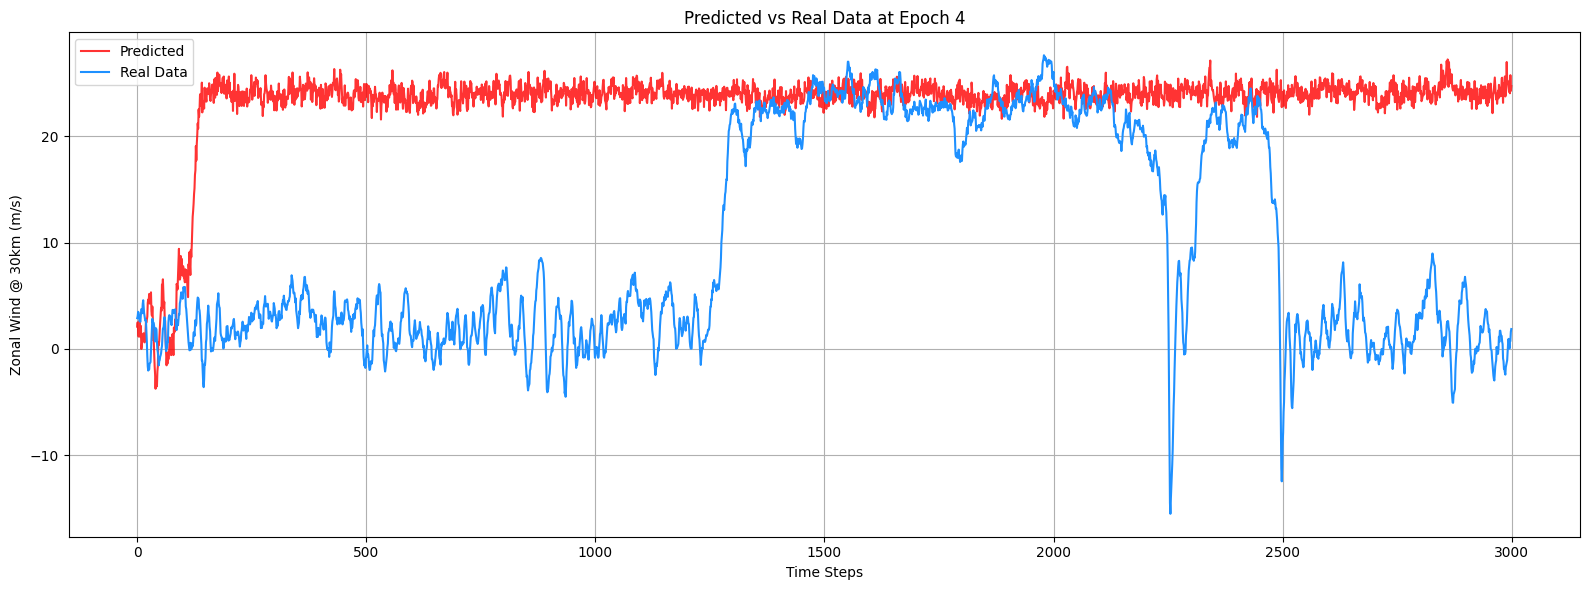

Epoch 6, 
        Reconstrunction Loss: 0.0077140480279922485

        Validation Reconstrunction Loss: 0.013917244970798492


Mini Inference at Epoch 5: 100%|██████████| 3000/3000 [00:01<00:00, 1953.39it/s]


<Figure size 640x480 with 0 Axes>

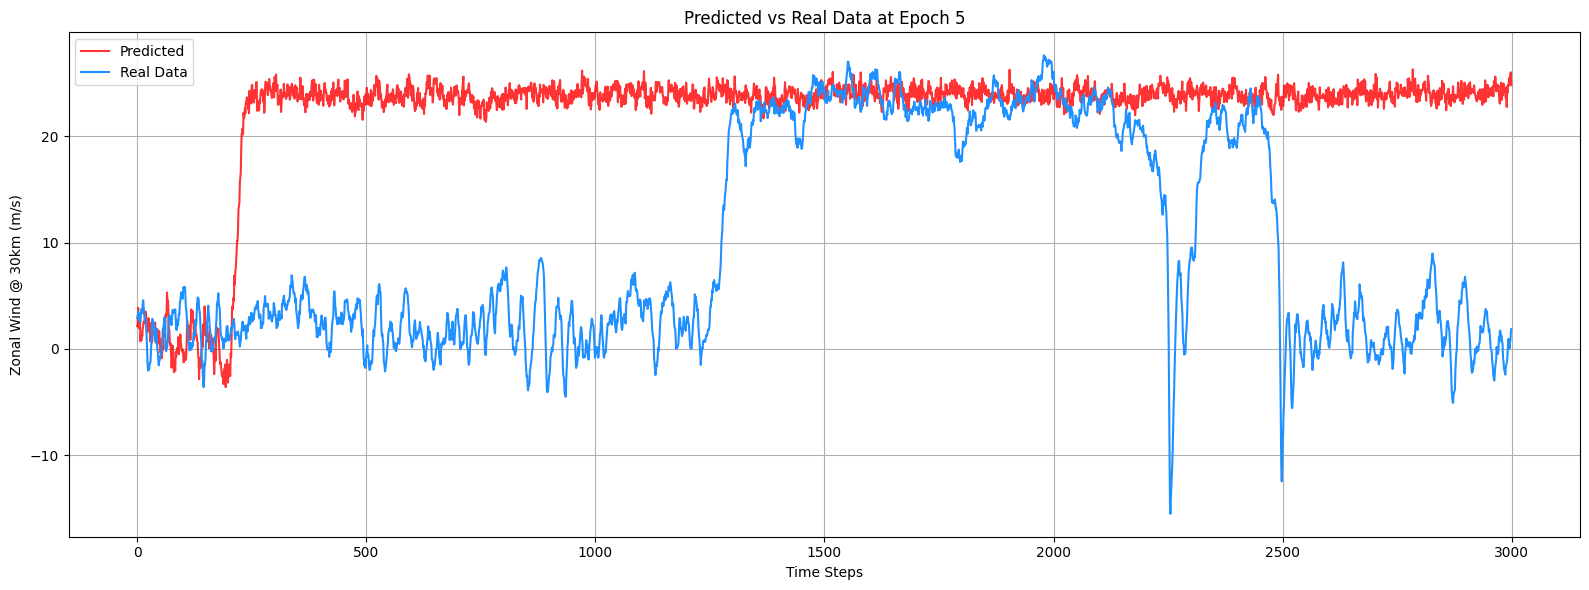

Epoch 7, 
        Reconstrunction Loss: 0.006671915762126446

        Validation Reconstrunction Loss: 0.01178913563489914


Mini Inference at Epoch 6: 100%|██████████| 3000/3000 [00:01<00:00, 1939.36it/s]


<Figure size 640x480 with 0 Axes>

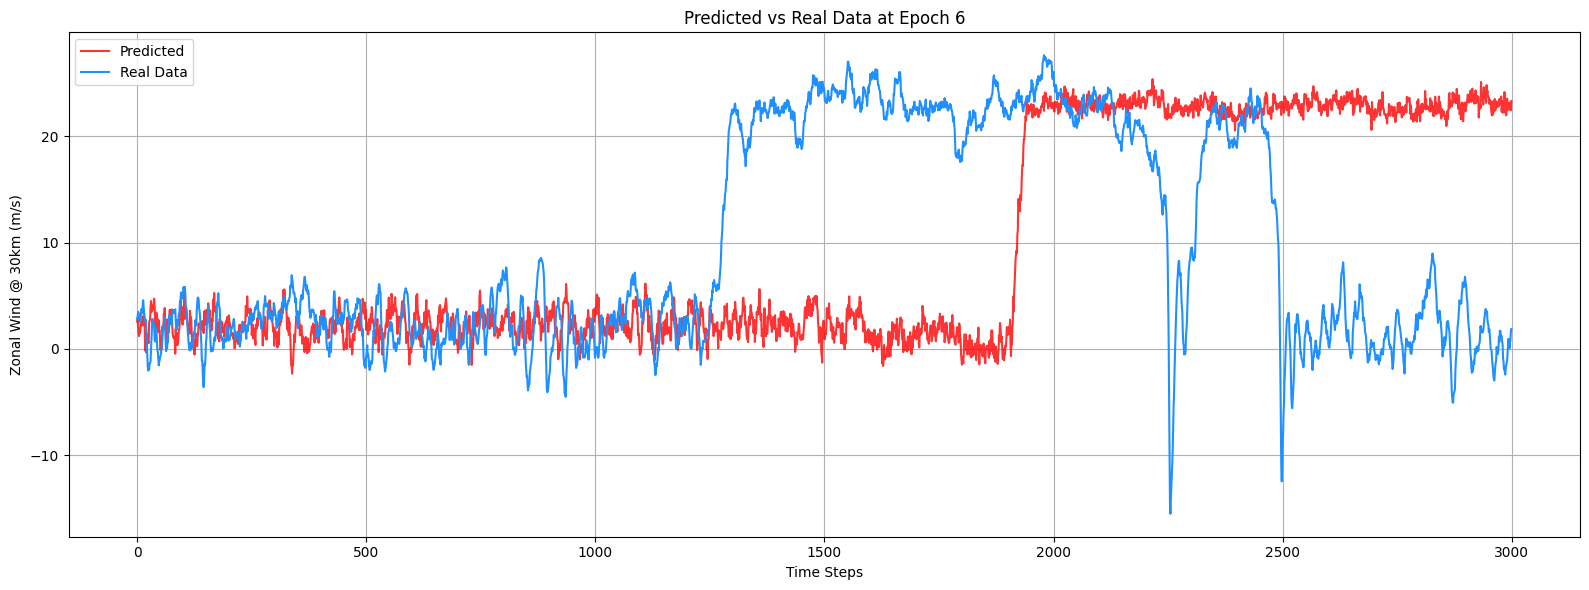

Epoch 8, 
        Reconstrunction Loss: 0.006331305019557476

        Validation Reconstrunction Loss: 0.010795916430652142


Mini Inference at Epoch 7:  41%|████▏     | 1238/3000 [00:00<00:00, 2063.38it/s]


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [16]:
from scipy.stats import linregress
from tqdm import tqdm

def normalize_transition_time(slope_value, delta, transition_real):
    normalized = 1 - np.exp(-np.abs((slope_value - transition_real)) / delta)
    return normalized

def total_variation_distance(p, q):
    p = np.array(p)
    q = np.array(q)
    return 0.5 * np.sum(np.abs(p - q))

def calculate_transition_durations(y_values, upper_bound, lower_bound):
    times_between_transitions = []
    transition_start = None
    above_upper = False
    below_lower = False
    for i in range(1, len(y_values)):
        if y_values[i] < lower_bound:
            below_lower = True
            above_upper = False
        elif y_values[i] > upper_bound:
            if below_lower and transition_start is not None:
                times_between_transitions.append(i - transition_start)
                transition_start = None
            above_upper = True
            below_lower = False
        if below_lower and transition_start is None:
            transition_start = i
    return times_between_transitions


upper_bound = 53.8 / 2.8935
lower_bound = 7.41
level = 63
real_data = np.load(r"C:\Users\danie\OneDrive\Desktop\work_torch\long_run_310k.npy")
real_data_1d = real_data[:, 1, level]
real_durations = calculate_transition_durations(real_data_1d, upper_bound, lower_bound)
real_data_sorted = np.sort(real_durations)
transition_real = np.mean(real_data_sorted)
actual_hist, bin_edges = np.histogram(real_data[:, 1, level], bins=50, density=True)
print(f"Reference Real Data average_transition_time: {transition_real}")

# Train the model
for epoch in range(num_epochs):
    z_train = torch.zeros([batch_size,latent_dim])
    z_val = torch.zeros([batch_size,latent_dim])
    model.train()
    for batch in range (0, trainN, batch_size):
        input_batch = psi_train_input[batch:batch + batch_size,:]
        label_batch = psi_train_label[batch:batch + batch_size,:]

        optimizer.zero_grad()

        z_train = torch.randn_like(z_train)
        z_train = z_train[:input_batch.shape[0],:]

        output = model(z_train.float().cuda(), input_batch.float().cuda())

        # Reconstruction loss
        reconstruction_loss = F.huber_loss(output, label_batch.float().cuda(), reduction="mean", delta = 1)
        
        #current loss
        loss = reconstruction_loss

        loss.backward()
        optimizer.step()

    print(f'''Epoch {epoch+1}, 
        Reconstrunction Loss: {loss.item()}''')

    # Validation Loss
    for batch in range (0, valN, batch_size):

        input_batch = psi_val_input[batch:batch + batch_size,:]
        label_batch = psi_val_label[batch:batch + batch_size,:]
        
        z_val = torch.randn_like(z_val)
        z_val = z_val[:input_batch.shape[0],:]

        output = model(z_val.float().cuda(), input_batch.float().cuda())

        # Reconstruction loss
        val_reconstruction_loss = F.huber_loss(output, label_batch.float().cuda(), reduction="mean", delta = 1)
        
        # Total loss
        val_loss = val_reconstruction_loss

    print(f'''
        Validation Reconstrunction Loss: {val_loss.item()}''')
      
    torch.save(model.state_dict(), f"{folder}/model_at_epoch{epoch}")
    
    # Mini Inference after each epoch
    model.eval()
    with torch.no_grad():
        initial_cond = torch.reshape(torch.tensor(psi[0,:]), [1, 75]).float().cuda()
        z = torch.zeros([1, latent_dim]).float().cuda()
        time_steps = 3000
        pred = np.zeros([time_steps, 75])
        for k in tqdm(range(0, time_steps), desc = f"Mini Inference at Epoch {epoch}"):
                z = torch.randn_like(z)
                y = (model.decode(z.float().cuda(), initial_cond.float().cuda())).detach().cpu().numpy()
                pred[k, :] = y
                y_denorm = (y * std_psi[:, :] + mean_psi[:, :])
                initial_cond = torch.tensor((y_denorm - mean_psi[:, :]) / std_psi[:, :])
  
    pred_mean = pred * std_psi + mean_psi
    plt.figure(figsize=(16, 6))
    plt.plot(pred_mean[:, level], label='Predicted', color='red', alpha=0.8)
    plt.plot(real_data[:time_steps, 1, level], label='Real Data', color='dodgerblue')
    plt.title(f'Predicted vs Real Data at Epoch {epoch}')
    plt.xlabel('Time Steps')
    plt.ylabel('Zonal Wind @ 30km (m/s)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.savefig(f'{folder}/epoch_{epoch}_pred_vs_real.png')

In [ ]:


# MODIFY THIS LINE FOR MODEL TESTING
model_weights_path = r""

if os.path.exists(model_weights_path):
    model.load_state_dict(torch.load(model_weights_path))
    print(f"Model weights loaded from {model_weights_path}.")

for _ in range (0,1):
    
    initial_cond = torch.reshape(torch.tensor(psi[0,:]), [1, 75])
    time_step = 300000
    z = torch.zeros([1,latent_dim])
    num_ens = 1
    pred = np.zeros ([time_step, 75, num_ens])

    for k in tqdm(range (0, time_step), desc = "Inference"):
        z = torch.randn_like(z)
        y = (model.decode(z.float().cuda(),initial_cond.float().cuda())).detach().cpu().numpy()
        pred[k,:] = y
        y_denorm = (y * std_psi[:, :] + mean_psi[:, :])
        initial_cond = torch.tensor((y_denorm - mean_psi[:, :]) / std_psi[:, :])

    # Denormalize final preds
    pred = pred.reshape(pred.shape[0], pred.shape[1])
    print(pred.shape, psi.shape)
    pred_mean = pred[:300000, :] * std_psi[:, :] + mean_psi[:, :]
    
    # Denormalize test labels
    actual_values = psi[:300000, :] * std_psi[:, :] + mean_psi[:, :]
    print(actual_values)

    plt.figure(figsize=(20,8))
    plt.plot(pred_mean[0:30000, 63], color = 'red')
    plt.plot(actual_values[0:30000, 63], color ='dodgerblue')
    plt.grid(True)
    plt.title(f"Predictions vs Actual")
    plt.savefig(f'C:\Users\danie\OneDrive\Desktop\work_torch\{datetime.datetime.now()}.png')
    plt.show()

    np.save(f'C:\Users\danie\OneDrive\Desktop\work_torch', pred_mean)

# Testing

In [ ]:
#FLAGS to determine testing
plot_data = 1
#what level do you want to plot
level = 63
CCDF = 1
Bi_modal_distribution = 1
single_step_profiles = 1
#for the single_step_profiles
NUM_SAMPLES = 5
#what weights do you want to use?
MODEL_PATH = r"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_KL_TEST_at_2025-06-03 10:39:03.562572/model_at_2_with_kl_10/checkpoint_2"
LEVEL = 63

import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

# Load the data; shape = (300000, 2, 75)
real_data = np.load(r"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/data/actual/long_run_310k.npy")
predictions = np.load(r"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/predictions_best_checkpoint_and_cycle_Resnet_VAE_1.npy")

#reshape the predictions so that it matches the real_data shape
print(predictions.shape)
print(real_data.shape)
timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S.%f")
folder = f"testing_at_{timestamp}"
os.mkdir(folder)
subfolders = ['timeseries', 'CCDF', 'bi_modal_distribution', 'single_step_profiles']
# Create each subdirectory inside the main folder
for subfolder in subfolders:
    path = os.path.join(folder, subfolder)
    os.mkdir(path)
    print(f"Created subfolder: {path}")
SAVE_DIR = os.path.join(folder, "single_step_profiles")
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import random

model = ConditionalVAE(latent_dim, output_dim, condition_dim)
model = model.cuda()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# MODIFY THIS LINE FOR MODEL TESTING
model_weights_path = "/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-11 12:46:39.526973/model_at_0/checkpoint_3"

if os.path.exists(model_weights_path):
    model.load_state_dict(torch.load(model_weights_path))
    print(f"Model weights loaded from {model_weights_path}.")
    
if (plot_data):
    #note that the value 300000 will have to change depending on the real and predictions data length
    u_profile_real = real_data[:300000, 1, level]  # Match time length with predictions
    u_profile_pred = predictions[:, level]
    time_steps = np.arange(len(u_profile_pred))

    # === Plot ===
    plt.figure(figsize=(14, 6))

    plt.plot(time_steps, u_profile_real, label='Real Data', alpha=0.7)
    plt.plot(time_steps, u_profile_pred, label='Predictions', linestyle='--')


    # Labels, legend, and formatting
    plt.xlabel('Time step')
    plt.ylabel('U (m/s)')
    plt.title(f'Time Series of U at Vertical Level {level}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    save_path = os.path.join(folder, "timeseries")
    save_path = os.path.join(save_path, "real_prediction_plot")
    plt.savefig(save_path)
    plt.show()

if (CCDF):
    real_data_1d = real_data[:, 1, 63]  # Now shape is (309700,)
    predictions_1d = predictions[:, 63]  # shape (300000,)

    # Define bounds (assuming they apply to both datasets)
    upper_bound = 53.8 / 2.8935
    lower_bound = 1.75 / 2.8935

    # Function to calculate transition durations
    def calculate_transition_durations(y_values, upper_bound, lower_bound):
        times_between_transitions = []
        transition_start = None
        above_upper = False
        below_lower = False

        for i in range(1, len(y_values)):
            if y_values[i] < lower_bound:  
                below_lower = True
                above_upper = False
            elif y_values[i] > upper_bound:  
                if below_lower and transition_start is not None:
                    times_between_transitions.append(i - transition_start)
                    transition_start = None  
                above_upper = True
                below_lower = False

            if below_lower and transition_start is None:
                transition_start = i

        return times_between_transitions

    # Compute transition durations for real data
    real_durations = calculate_transition_durations(real_data_1d, upper_bound, lower_bound)

    # Compute transition durations for predictions data
    pred_durations = calculate_transition_durations(predictions_1d, upper_bound, lower_bound)

    # Plot setup
    plt.figure(figsize=(10, 6))

    # === REAL DATA CCDF AND FIT ===
    if len(real_durations) == 0:
        print("No transitions detected in real data with current bounds!")
    else:
        real_data_sorted = np.sort(real_durations)
        x_line_real = np.linspace(min(real_data_sorted), max(real_data_sorted), 100)
        exponential_fit_real = 1/np.mean(real_data_sorted)
        y_values_real = exponential_fit_real*x_line_real
        plt.plot(x_line_real, y_values_real, 'b-', label=f'Real Exp Fit (slope={exponential_fit_real:.4f})', linewidth=2)

    # === PREDICTIONS CCDF AND FIT ===
    if len(pred_durations) == 0:
        print("No transitions detected in predictions with current bounds!")
    else:
        pred_data_sorted = np.sort(pred_durations)
        x_line_pred = np.linspace(min(pred_data_sorted), max(pred_data_sorted), 100)
        exponential_fit_pred = 1/np.mean(pred_data_sorted)
        y_values_pred = exponential_fit_pred*x_line_pred
        plt.plot(x_line_pred, y_values_pred, 'r-', label=f'Pred Exp Fit (slope={exponential_fit_pred:.4f})', linewidth=2)

    print(1/np.mean(real_data_sorted))
    print(1/np.mean(pred_data_sorted))
    # Plot labels and formatting
    plt.xlabel('Time Duration (Steps)')
    plt.ylabel('CCDF')
    plt.title('CCDF of Time Between B->A and A->B Transitions (Exponential Fit)')
    plt.yscale("linear")  # y-axis log scale
    plt.xscale("linear")  # x-axis linear scale
    plt.grid()
    plt.legend()
    plt.tight_layout()
    save_path = os.path.join(folder, "CCDF")
    save_path = os.path.join(save_path, "CCDF_plot")
    plt.savefig(save_path)
    plt.show()
if (Bi_modal_distribution):
    zonal_wind_data_real = real_data[:, 1, 63]  # variable index 1 (e.g., zonal wind), level 60
    zonal_wind_data_predictions = predictions[:, 63]  # variable index 0 (predictions), level 60

    print(f"Shape of zonal_wind_data_real: {zonal_wind_data_real.shape}")
    print(f"Shape of zonal_wind_data_predictions: {zonal_wind_data_predictions.shape}")

    # Plot the bimodal histogram
    plt.figure(figsize=(12, 6))

    # Create histograms (overlaid)
    sns.histplot(zonal_wind_data_real, bins=50, kde=True, color='black', alpha=0.6, element='step', label='Real Data')
    sns.histplot(zonal_wind_data_predictions, bins=50, kde=True, color='red', alpha=0.6, element='step', label='Predictions')

    # Customize plot labels and title
    plt.title('Distribution of Zonal Winds For Real Data and Predictions', fontsize=16)
    plt.xlabel('Zonal Wind (m/s)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Add vertical lines at means
    plt.axvline(np.mean(zonal_wind_data_real), color='black', linestyle='--', label=f'Real Mean: {np.mean(zonal_wind_data_real):.2f}')
    plt.axvline(np.mean(zonal_wind_data_predictions), color='red', linestyle='--', label=f'Pred Mean: {np.mean(zonal_wind_data_predictions):.2f}')

    # Final plot settings
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    save_path = os.path.join(folder, "bi_modal_distribution")
    save_path = os.path.join(save_path, "bi_modal_distribution_plot")
    plt.savefig(save_path)
    plt.show()
if (single_step_profiles):
    # Ensure save directory exists
    os.makedirs(SAVE_DIR, exist_ok=True)

    # === Load model weights ===
    model.load_state_dict(torch.load(MODEL_PATH))
    model.eval()

    # === Randomly sample time points from real data ===
    time_indices = random.sample(range(0, real_data.shape[0] - 2), NUM_SAMPLES)
    print(f"Randomly sampled time steps: {time_indices}")

    # === Time series visualization ===
    real_data_timeseries = real_data[:, 1, LEVEL]
    time_steps_all = np.arange(len(real_data_timeseries))

    plt.figure(figsize=(12, 6))
    plt.plot(time_steps_all, real_data_timeseries, label="Real Data at Level 61", color='blue')

    # Mark sample points
    for idx_num, idx in enumerate(time_indices):
        plt.axvline(x=idx, color='green', linestyle='--', linewidth=2)
    if len(time_indices) > 0:
        plt.axvline(x=time_indices[0], color='green', linestyle='--', linewidth=2, label='Sampled Points')

    plt.title("Real Data Time Series with Sampled Points Highlighted")
    plt.xlabel("Time Step")
    plt.ylabel("U (m/s) at Level 61")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    save_path = os.path.join(SAVE_DIR, "real_data_timeseries_with_samples.png")
    plt.savefig(save_path)
    plt.show()

    # === Iterate over each sampled time point ===
    for i, time_step in enumerate(time_indices):
        next_time_step = time_step + 1

        # === Real data: current and next ===
        real_current = real_data[time_step, 1, :]       
        real_next = real_data[next_time_step, 1, :]      

        # === Normalize real_current and make prediction for next step ===
        initial_cond = torch.reshape(torch.tensor(psi[time_step,:]), [1, 75])
        z = torch.zeros([1,latent_dim])
        num_ens = 1
        pred = np.zeros ([time_step, 75, num_ens])

        with torch.no_grad():
            z = torch.randn_like(z)
            print(z.shape, initial_cond.shape)
            y = (model.decode(z.float().cuda(),initial_cond.float().cuda())).detach().cpu().numpy()

        # === Denormalize predicted next ===
        pred_next_denorm = y.squeeze() * std_psi.squeeze() + mean_psi.squeeze()

        # === Extract U, Re(Psi), Im(Psi) components ===
        # U profiles
        U_current_real = real_current[51:74]
        U_next_real = real_next[51:74]
        U_next_pred = pred_next_denorm[51:74]

        # Re(Psi) profiles
        RePsi_current_real = real_current[0:24]
        RePsi_next_real = real_next[0:24]
        RePsi_next_pred = pred_next_denorm[0:24]

        # Im(Psi) profiles
        ImPsi_current_real = real_current[25:50]
        ImPsi_next_real = real_next[25:50]
        ImPsi_next_pred = pred_next_denorm[25:50]

        # === Differences ===
        U_diff_real = U_next_real - U_current_real
        U_diff_pred = U_next_pred - U_current_real

        RePsi_diff_real = RePsi_next_real - RePsi_current_real
        RePsi_diff_pred = RePsi_next_pred - RePsi_current_real

        ImPsi_diff_real = ImPsi_next_real - ImPsi_current_real
        ImPsi_diff_pred = ImPsi_next_pred - ImPsi_current_real

        # === Create a single figure with 3 rows (U, Re(Psi), Im(Psi)) ===
        fig, axes = plt.subplots(3, 2, figsize=(16, 18))  # 3 rows, 2 columns (Profile and Difference)

        z_levels_U = np.linspace(0, 70, 23)
        z_levels_RePsi = np.linspace(0, 70, 24)
        z_levels_ImPsi = np.linspace(0, 70, 25)

        # --- U ---
        axes[0, 0].plot(U_current_real, z_levels_U, 'x-', label="Real Current")
        axes[0, 0].plot(U_next_real, z_levels_U, 'd-', label="Real Next")
        axes[0, 0].plot(U_next_pred, z_levels_U, 's--', label="Predicted Next")
        axes[0, 0].set_title(f"U Profiles @ Step {time_step}")
        axes[0, 0].set_xlabel("U (m/s)")
        axes[0, 0].set_ylabel("Vertical Levels (km)")
        axes[0, 0].legend()

        axes[0, 1].plot(U_diff_real, z_levels_U, 'xb', label="Real Δ (Next - Current)")
        axes[0, 1].plot(U_diff_pred, z_levels_U, 'o--r', label="Pred Δ (Next - Current)")
        axes[0, 1].set_title("U Difference (Next - Current)")
        axes[0, 1].set_xlabel("ΔU (m/s)")
        axes[0, 1].legend()

        # --- Re(Psi) ---
        axes[1, 0].plot(RePsi_current_real, z_levels_RePsi, 'x-', label="Real Current")
        axes[1, 0].plot(RePsi_next_real, z_levels_RePsi, 'd-', label="Real Next")
        axes[1, 0].plot(RePsi_next_pred, z_levels_RePsi, 's--', label="Predicted Next")
        axes[1, 0].set_title(f"Re(Psi) Profiles @ Step {time_step}")
        axes[1, 0].set_xlabel("Re(Psi)")
        axes[1, 0].set_ylabel("Vertical Levels (km)")
        axes[1, 0].legend()

        axes[1, 1].plot(RePsi_diff_real, z_levels_RePsi, 'xb', label="Real Δ (Next - Current)")
        axes[1, 1].plot(RePsi_diff_pred, z_levels_RePsi, 'o--r', label="Pred Δ (Next - Current)")
        axes[1, 1].set_title("Re(Psi) Difference (Next - Current)")
        axes[1, 1].set_xlabel("ΔRe(Psi)")
        axes[1, 1].legend()

        # --- Im(Psi) ---
        axes[2, 0].plot(ImPsi_current_real, z_levels_ImPsi, 'x-', label="Real Current")
        axes[2, 0].plot(ImPsi_next_real, z_levels_ImPsi, 'd-', label="Real Next")
        axes[2, 0].plot(ImPsi_next_pred, z_levels_ImPsi, 's--', label="Predicted Next")
        axes[2, 0].set_title(f"Im(Psi) Profiles @ Step {time_step}")
        axes[2, 0].set_xlabel("Im(Psi)")
        axes[2, 0].set_ylabel("Vertical Levels (km)")
        axes[2, 0].legend()

        axes[2, 1].plot(ImPsi_diff_real, z_levels_ImPsi, 'xb', label="Real Δ (Next - Current)")
        axes[2, 1].plot(ImPsi_diff_pred, z_levels_ImPsi, 'o--r', label="Pred Δ (Next - Current)")
        axes[2, 1].set_title("Im(Psi) Difference (Next - Current)")
        axes[2, 1].set_xlabel("ΔIm(Psi)")
        axes[2, 1].legend()

        # === Finalize and Save ===
        plt.suptitle(f"Single Step Profile Comparisons at Time Step {time_step}", fontsize=18)
        plt.tight_layout(rect=[0, 0.03, 1, 0.97])

        save_path = os.path.join(SAVE_DIR, f"Profile_Summary_point_{time_step}.png")
        plt.savefig(save_path)
        plt.show()

        print(f"Combined plot saved for sampled point {time_step}")

    # Final debug
    print("Finished processing all sampled points.")
        # Debugging prints
    print(predictions.shape) 
    print(real_data.shape)